In [66]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [67]:
img=cv2.imread('./test_images/taylor_1.png')
img.shape

(909, 639, 3)

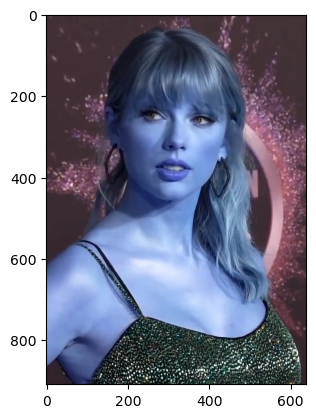

In [68]:
plt.imshow(img)

In [69]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(909, 639)

In [70]:
gray

array([[55, 55, 54, ..., 53, 53, 53],
       [55, 55, 54, ..., 53, 53, 53],
       [56, 55, 56, ..., 53, 53, 53],
       ...,
       [38, 38, 38, ..., 40, 40, 40],
       [38, 38, 38, ..., 40, 40, 40],
       [38, 38, 38, ..., 40, 40, 40]], dtype=uint8)

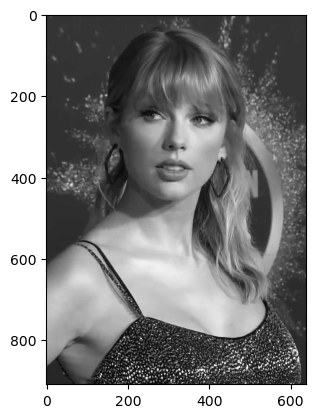

In [71]:
plt.imshow(gray,cmap='gray')

In [72]:
face_cascade=cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(r"C:\Users\pepsi\Downloads\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_eye_tree_eyeglasses.xml")
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[155, 113, 340, 340]])

In [73]:
(x,y,w,h)=faces[0]
x,y,w,h

(155, 113, 340, 340)

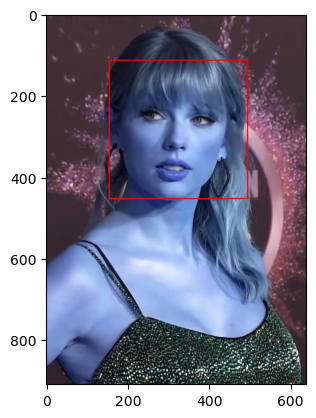

In [74]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

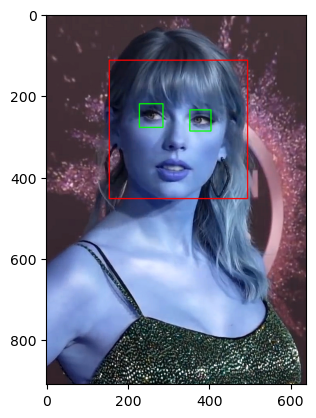

In [75]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

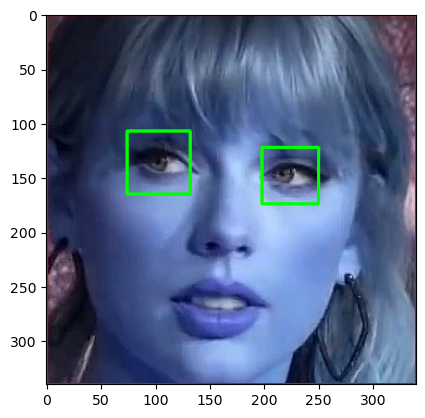

In [76]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [77]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes)>=2):
            return roi_color

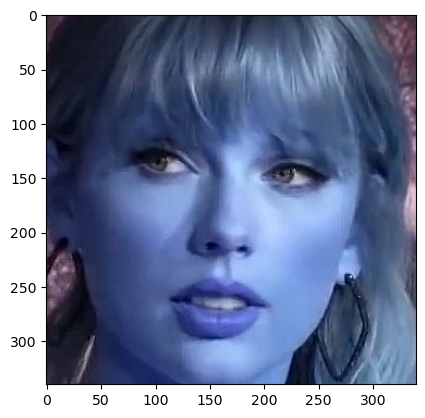

In [78]:
cropped_image=get_cropped_image_if_2_eyes('./test_images/taylor_1.png')
plt.imshow(cropped_image)

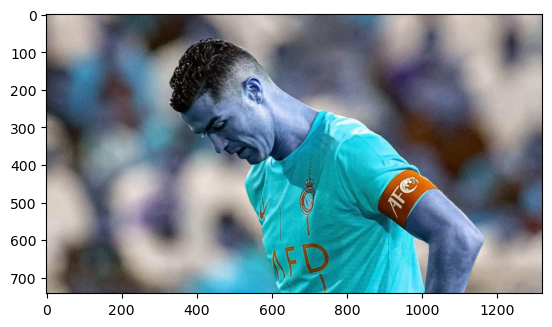

In [79]:
obstruct_image=cv2.imread(r"C:\Users\pepsi\Downloads\CelebrityFaceRecognition\model\test_images\ronaldo_1.jpg")
plt.imshow(obstruct_image)

In [80]:
obstruct_image=get_cropped_image_if_2_eyes('./test_images/ronaldo_1.jpg')
obstruct_image

In [81]:
path_to_data="./dataset/"
path_to_cr_data="./dataset/cropped/"

In [82]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [83]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/elon_musk',
 './dataset/narendra_modi',
 './dataset/taylor_swift',
 './dataset/virat_kohli']

In [84]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [87]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped image in folder:",cropped_folder)
                
            cropped_file_name=celebrity_name+str(count) + ".png"
            cropped_file_path=cropped_folder+ "/" +cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

cristiano_ronaldo
Generating cropped image in folder: ./dataset/cropped/cristiano_ronaldo
elon_musk
Generating cropped image in folder: ./dataset/cropped/elon_musk
narendra_modi
Generating cropped image in folder: ./dataset/cropped/narendra_modi
taylor_swift
Generating cropped image in folder: ./dataset/cropped/taylor_swift
virat_kohli
Generating cropped image in folder: ./dataset/cropped/virat_kohli


In [100]:
import numpy as np
import pywt
import cv2
def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray /=255;
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H= np.uint8(imArray_H)
    
    return imArray_H

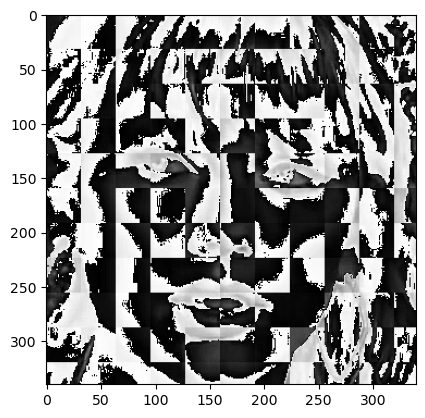

In [101]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [102]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'cristiano_ronaldo': 0,
 'elon_musk': 1,
 'narendra_modi': 2,
 'taylor_swift': 3,
 'virat_kohli': 4}

In [109]:
X,y=[],[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(celebrity_name)

In [110]:
len(X[0])

4096

In [113]:
X=np.array(X).reshape(len(X),4096).astype(float)
X.shape

(195, 4096)

In [114]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
pipe=Pipeline([('Scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8367346938775511

In [116]:
print(classification_report(y_test,pipe.predict(X_test)))

                   precision    recall  f1-score   support

cristiano_ronaldo       0.89      0.89      0.89         9
        elon_musk       0.67      0.86      0.75        14
    narendra_modi       1.00      0.80      0.89        10
     taylor_swift       0.88      0.78      0.82         9
      virat_kohli       1.00      0.86      0.92         7

         accuracy                           0.84        49
        macro avg       0.89      0.84      0.85        49
     weighted avg       0.86      0.84      0.84        49



In [118]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [124]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
        'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [128]:
scores=[]
best_estimators={}
import pandas as pd
for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.884138,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.739770,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.869885,{'logisticregression__C': 1}


In [129]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [130]:
best_estimators['svm'].score(X_test,y_test)

0.8571428571428571

In [131]:
best_estimators['random_forest'].score(X_test,y_test)

0.6530612244897959

In [132]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8367346938775511

In [133]:
best_clf=best_estimators['svm']

In [135]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  0,  0],
       [ 1, 12,  0,  1,  0],
       [ 0,  1,  8,  1,  0],
       [ 0,  1,  0,  8,  0],
       [ 2,  0,  0,  0,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

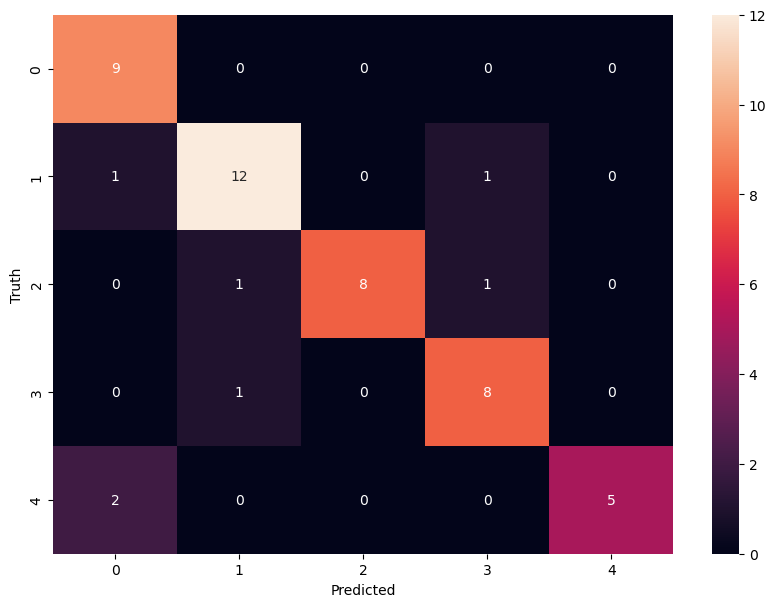

In [138]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [139]:
class_dict

{'cristiano_ronaldo': 0,
 'elon_musk': 1,
 'narendra_modi': 2,
 'taylor_swift': 3,
 'virat_kohli': 4}

In [140]:
!pip install joblib


In [141]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [142]:
import json
with open('class_dictionary.json',"w") as f:
    f.write(json.dumps(class_dict))